In [2]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio

In [3]:
sourceFilesPrefix="ExpectedResults\\music-"
#sourceFilesPrefix="s"
resultFilesPrefix="AudioResults\\fromExpectedmatlab-"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
print(sample1_data.std(axis=0))
#plt.figure(1)
#plt.plot(sample1_data)
#plt.title("data1")
#plt.show()

rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
print(sample2_data.std(axis=0))
#plt.figure(2)
#plt.plot(sample2_data)
#plt.title("data2")
#plt.show()

5564.16372545
2619.18445716


In [4]:
def sigmoid(y):
    #g=np.zeros(y.shape)
    g=np.divide(1,np.add(1,np.exp(-y)))
    #print(g)
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

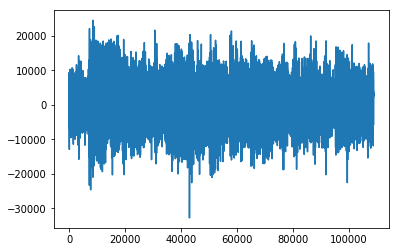

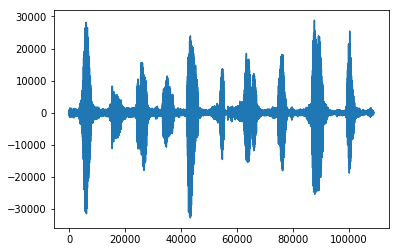

In [5]:
S1=np.c_[sample1_data,sample2_data]
S2=np.c_[sample1_data,sample2_data]

plt.figure(1)
plt.plot(sample1_data)
plt.show()
plt.figure(2)
plt.plot(sample2_data)
plt.show()
#S1/=S1.std(axis=0)
med1=S1.std(axis=0)
S1= S1/med1
#S2/=S2.std(axis=0)
med2=S2.std(axis=0)
S2=S2/med2

mixingMatrix1=np.array([1.1,0.7])
mixingMatrix2=np.array([1.5,0.5])
m=np.matrix([mixingMatrix1,mixingMatrix2])
X1=np.dot(S1,mixingMatrix1.T)
X2=np.dot(S2,mixingMatrix2.T)
#plt.figure(2)
#plt.plot(X1)
#plt.plot(X2)
#plt.show()
X=np.c_[X1,X2]
X=X.T

[[ 0.37831158  0.89899987]
 [ 0.86247488  0.8840705 ]]


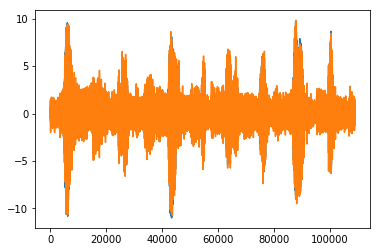

[[ 0.00628603  0.00855915]
 [ 0.00619228  0.0020681 ]]


In [15]:
eta=0.01
eta0=eta
T=1000
num_iter=20000
W=np.random.random(m.shape)/50
A=np.random.random((2,2))
print(A)

med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2

orig=np.matrix([s1data,s2data])
X=np.dot(A,orig)
plt.figure(1)
plt.plot(X.T)
plt.show()
print(W)
#print("W "+str(W))
#numSrc=X.shape[0]
#print(numSrc)
#print(W)
#print(b)

In [16]:
Audio(data=X[0], rate=16000)

In [17]:
Audio(data=X[1], rate=16000)

In [18]:
print(W)
for i in range(0,num_iter):
    Y=np.dot(W,X)
    delW=gradient(eta,Y,W)
    aux=W+delW
    W=aux
    eta=eta0/(1+(i/T))
    if i%100==0:
        print("delW "+str(delW))
        print("W "+str(W))
    #print("eta "+str(eta))

[[ 0.00628603  0.00855915]
 [ 0.00619228  0.0020681 ]]
delW [[-0.0013261  -0.00132757]
 [-0.0006522  -0.00070322]]
W [[ 0.00495993  0.00723158]
 [ 0.00554009  0.00136487]]
delW [[ -2.11309171e-05   1.19020259e-05]
 [  3.48532401e-05  -2.96544797e-05]]
W [[-0.00090951  0.00406538]
 [ 0.00636293 -0.00325964]]
delW [[ -1.25788255e-05   9.23193810e-06]
 [  2.36855166e-05  -1.88507766e-05]]
W [[-0.00267016  0.00525444]
 [ 0.00953705 -0.00584064]]
delW [[ -3.64426803e-06   2.74276841e-06]
 [  6.95485033e-06  -5.49891055e-06]]
W [[-0.00341577  0.00580944]
 [ 0.01095163 -0.00696233]]
delW [[ -8.45594723e-07   6.39101072e-07]
 [  1.61691501e-06  -1.27692659e-06]]
W [[-0.00360661  0.0059534 ]
 [ 0.01131625 -0.00725045]]
delW [[ -2.01511909e-07   1.52411971e-07]
 [  3.84968189e-07  -3.03880955e-07]]
W [[-0.00365096  0.00598693]
 [ 0.01140103 -0.00731739]]
delW [[ -5.19945852e-08   3.93085377e-08]
 [  9.88415355e-08  -7.79562244e-08]]
W [[-0.00366184  0.00599516]
 [ 0.0114218  -0.00733378]]
delW [

delW [[ -7.08575718e-11   4.55023794e-11]
 [ -2.27309121e-11   3.71892799e-11]]
W [[-0.00366666  0.00599872]
 [ 0.01142938 -0.00733957]]
delW [[ -6.98594823e-11   4.48614258e-11]
 [ -2.24107752e-11   3.66654720e-11]]
W [[-0.00366667  0.00599872]
 [ 0.01142938 -0.00733956]]
delW [[ -6.88891208e-11   4.42382788e-11]
 [ -2.20995314e-11   3.61562155e-11]]
W [[-0.00366667  0.00599873]
 [ 0.01142938 -0.00733956]]
delW [[ -6.79453475e-11   4.36322063e-11]
 [ -2.17968151e-11   3.56609123e-11]]
W [[-0.00366668  0.00599873]
 [ 0.01142938 -0.00733956]]
delW [[ -6.70270846e-11   4.30425162e-11]
 [ -2.15022807e-11   3.51789968e-11]]
W [[-0.00366669  0.00599874]
 [ 0.01142938 -0.00733955]]
delW [[ -6.61333113e-11   4.24685531e-11]
 [ -2.12156009e-11   3.47099334e-11]]
W [[-0.0036667   0.00599874]
 [ 0.01142937 -0.00733955]]
delW [[ -6.52630610e-11   4.19096961e-11]
 [ -2.09364655e-11   3.42532147e-11]]
W [[-0.0036667   0.00599875]
 [ 0.01142937 -0.00733954]]
delW [[ -6.44154170e-11   4.13653566e-11]

delW [[ -3.81526357e-11   2.45000288e-11]
 [ -1.22403900e-11   2.00250711e-11]]
W [[-0.00366697  0.00599892]
 [ 0.01142929 -0.0073394 ]]
delW [[ -3.78613851e-11   2.43129959e-11]
 [ -1.21469628e-11   1.98722134e-11]]
W [[-0.00366697  0.00599892]
 [ 0.01142929 -0.0073394 ]]
delW [[ -3.75745477e-11   2.41287969e-11]
 [ -1.20549513e-11   1.97216718e-11]]
W [[-0.00366698  0.00599892]
 [ 0.01142928 -0.0073394 ]]
delW [[ -3.72920239e-11   2.39473681e-11]
 [ -1.19643233e-11   1.95733941e-11]]
W [[-0.00366698  0.00599892]
 [ 0.01142928 -0.0073394 ]]
delW [[ -3.70137170e-11   2.37686473e-11]
 [ -1.18750480e-11   1.94273294e-11]]
W [[-0.00366698  0.00599893]
 [ 0.01142928 -0.0073394 ]]
delW [[ -3.67395335e-11   2.35925744e-11]
 [ -1.17870952e-11   1.92834287e-11]]
W [[-0.00366699  0.00599893]
 [ 0.01142928 -0.0073394 ]]
delW [[ -3.64693822e-11   2.34190910e-11]
 [ -1.17004358e-11   1.91416443e-11]]
W [[-0.00366699  0.00599893]
 [ 0.01142928 -0.00733939]]
delW [[ -3.62031750e-11   2.32481403e-11]

delW [[ -2.61042512e-11   1.67629226e-11]
 [ -8.37541888e-12   1.37016165e-11]]
W [[-0.00366716  0.00599904]
 [ 0.01142923 -0.00733931]]
delW [[ -2.59675788e-11   1.66751561e-11]
 [ -8.33157473e-12   1.36298846e-11]]
W [[-0.00366716  0.00599904]
 [ 0.01142923 -0.0073393 ]]
delW [[ -2.58323301e-11   1.65883039e-11]
 [ -8.28818728e-12   1.35588999e-11]]
W [[-0.00366716  0.00599904]
 [ 0.01142922 -0.0073393 ]]
delW [[ -2.56984830e-11   1.65023517e-11]
 [ -8.24524942e-12   1.34886507e-11]]
W [[-0.00366716  0.00599904]
 [ 0.01142922 -0.0073393 ]]
delW [[ -2.55660157e-11   1.64172857e-11]
 [ -8.20275418e-12   1.34191258e-11]]
W [[-0.00366717  0.00599904]
 [ 0.01142922 -0.0073393 ]]
delW [[ -2.54349072e-11   1.63330921e-11]
 [ -8.16069478e-12   1.33503140e-11]]
W [[-0.00366717  0.00599905]
 [ 0.01142922 -0.0073393 ]]
delW [[ -2.53051365e-11   1.62497578e-11]
 [ -8.11906455e-12   1.32822043e-11]]
W [[-0.00366717  0.00599905]
 [ 0.01142922 -0.0073393 ]]
delW [[ -2.51766833e-11   1.61672695e-11]

[[-0.00366721  0.00599907]
 [ 0.01142921 -0.00733928]]
[[-0.01646014  0.01657098]
 [-0.01107062  0.01782616]
 [-0.01006886  0.01335161]
 ..., 
 [ 0.02316562 -0.00786611]
 [ 0.0263803  -0.00980991]
 [ 0.01927453 -0.00871162]]


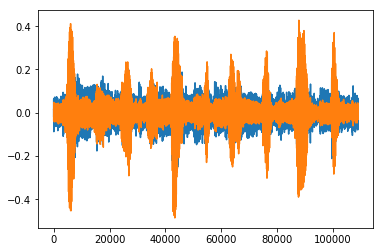

In [19]:
print(W)
#p=np.matrix([W[0],W[1]])
#p[1,1]=0.0268169
#p=p*10
#print(p)
Y2=np.dot(W*10,X)
print(Y2.T)
plt.figure(1)
plt.plot(Y2.T)
plt.show()

In [20]:
Audio(data=Y2[0], rate=16000)

In [21]:
Audio(data=Y2[1], rate=16000)

In [22]:
Audio(data=sample1_data, rate=16000)

In [23]:
Audio(data=sample2_data, rate=16000)